# Loading and Inspecting Financial Data

In [31]:
# Loading and Inspecting Financial Data
# We load daily closing prices for selected stocks using yfinance.
# Inspecting the data ensures it is ready for further analysis.

import yfinance as yf
import pandas as pd

# Download daily closing prices for selected stocks
tickers = ['AAPL', 'MSFT', 'GOOG', 'AMZN']
raw_data = yf.download(tickers, start='2020-01-01', end='2025-01-01')

# Inspect basic structure
print("Shape of raw data:", raw_data.shape)
print("Index sample (dates):", raw_data.index[:5])
print("Columns (MultiIndex):", raw_data.columns)

# Extract 'Close' prices and clean data
close_prices = raw_data['Close'].dropna()

# Final inspection
print("\nCleaned Close Price Data")
print("Shape:", close_prices.shape)
print("Index sample:", close_prices.index[:5])
print("Columns:", close_prices.columns)

close_prices.tail()


[*********************100%***********************]  4 of 4 completed

Shape of raw data: (1258, 20)
Index sample (dates): DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08'],
              dtype='datetime64[ns]', name='Date', freq=None)
Columns (MultiIndex): MultiIndex([( 'Close', 'AAPL'),
            ( 'Close', 'AMZN'),
            ( 'Close', 'GOOG'),
            ( 'Close', 'MSFT'),
            (  'High', 'AAPL'),
            (  'High', 'AMZN'),
            (  'High', 'GOOG'),
            (  'High', 'MSFT'),
            (   'Low', 'AAPL'),
            (   'Low', 'AMZN'),
            (   'Low', 'GOOG'),
            (   'Low', 'MSFT'),
            (  'Open', 'AAPL'),
            (  'Open', 'AMZN'),
            (  'Open', 'GOOG'),
            (  'Open', 'MSFT'),
            ('Volume', 'AAPL'),
            ('Volume', 'AMZN'),
            ('Volume', 'GOOG'),
            ('Volume', 'MSFT')],
           names=['Price', 'Ticker'])

Cleaned Close Price Data
Shape: (1258, 4)
Index sample: DatetimeIndex(['2020-01-02'

Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2024-12-24,257.916443,229.050003,197.345184,438.450836
2024-12-26,258.735504,227.050003,196.875717,437.233276
2024-12-27,255.309296,223.750000,193.819183,429.668457
2024-12-30,251.923019,221.300003,192.470734,423.979858
2024-12-31,250.144974,219.389999,190.223282,420.656525


# Descriptive Statistics and Distributional Properties

In [33]:
descriptive_stats = data.describe()
print(descriptive_stats)

Price         Close                                                High  \
Ticker         AAPL         AMZN         GOOG         MSFT         AAPL   
count   1006.000000  1006.000000  1006.000000  1006.000000  1006.000000   
mean     138.559273   137.216247   108.027180   256.127666   140.046785   
std       33.503217    27.468805    25.314992    55.230323    33.623833   
min       54.449898    81.820000    52.581947   129.621155    55.452163   
25%      120.921766   114.309002    87.862848   214.462250   122.168155   
50%      143.438835   140.585007   110.126141   252.848351   145.019568   
75%      163.906307   161.190620   130.837799   296.010841   166.192284   
max      196.927673   186.570496   149.998535   379.099304   198.428656   

Price                                                  Low               \
Ticker         AMZN         GOOG         MSFT         AAPL         AMZN   
count   1006.000000  1006.000000  1006.000000  1006.000000  1006.000000   
mean     139.034453   10

Descriptive Statistics of Log Returns
         count      mean       std       min       25%       50%       75%  \
Ticker                                                                       
AAPL    1257.0  0.000983  0.019940 -0.137708 -0.008460  0.001186  0.011918   
AMZN    1257.0  0.000667  0.022652 -0.151398 -0.011148  0.000781  0.012873   
GOOG    1257.0  0.000818  0.020417 -0.117667 -0.009582  0.002121  0.011170   
MSFT    1257.0  0.000803  0.019228 -0.159453 -0.008210  0.001111  0.010881   

             max    median  skewness  kurtosis  
Ticker                                          
AAPL    0.113157  0.001186 -0.112455  5.383340  
AMZN    0.126949  0.000781 -0.133621  4.089854  
GOOG    0.094994  0.002121 -0.235139  3.703328  
MSFT    0.132929  0.001111 -0.283957  7.550641  


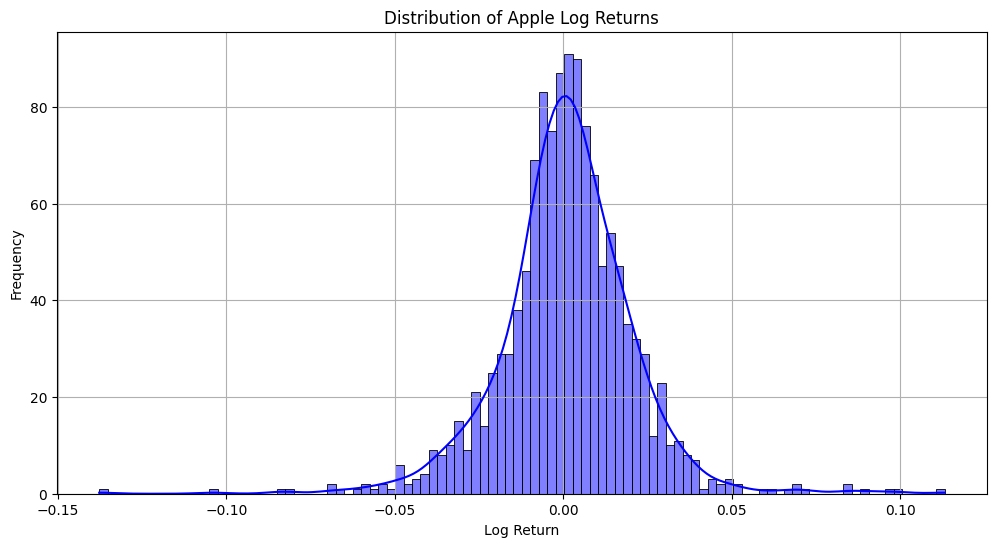

In [49]:
# Descriptive Statistics and Distributional Properties
# First, we compute log returns from daily closing prices.
# Next, we provide descriptive statistics to assess the distribution properties,
# including measures like mean, standard deviation, skewness, and kurtosis.

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate log returns
returns = np.log(close_prices / close_prices.shift(1)).dropna()

# Display descriptive statistics
desc_stats = returns.describe().T
desc_stats['median'] = returns.median()
desc_stats['skewness'] = returns.skew()
desc_stats['kurtosis'] = returns.kurtosis()

print("Descriptive Statistics of Log Returns")
print(desc_stats)

# Plot distribution for Apple returns
plt.figure(figsize=(12, 6))
sns.histplot(returns['AAPL'], bins=100, kde=True, color='blue')
plt.title('Distribution of Apple Log Returns')
plt.xlabel('Log Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


# Correlation and Cross-Asset Dynamics

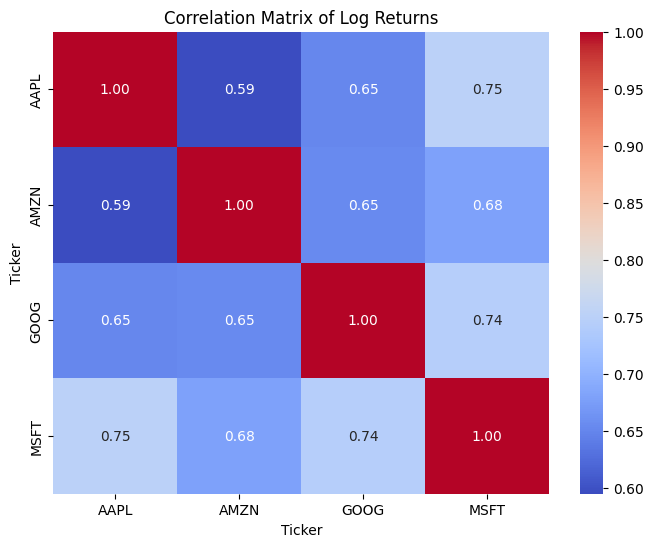

In [51]:
corr_matrix = returns.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Log Returns')
plt.show()

# Volatility Tracking and Risk Dynamics

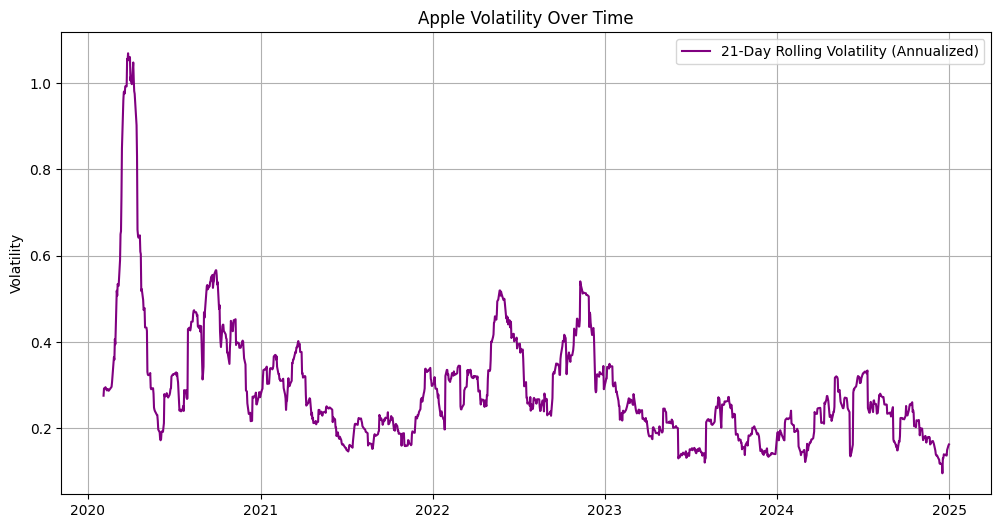

In [55]:
rolling_vol = returns['AAPL'].rolling(window=21).std() * np.sqrt(252)

plt.figure(figsize=(12, 6))
plt.plot(rolling_vol, label='21-Day Rolling Volatility (Annualized)', color='purple')
plt.title('Apple Volatility Over Time')
plt.ylabel('Volatility')
plt.grid(True)
plt.legend()
plt.show()

# Outlier and Anomaly Detection

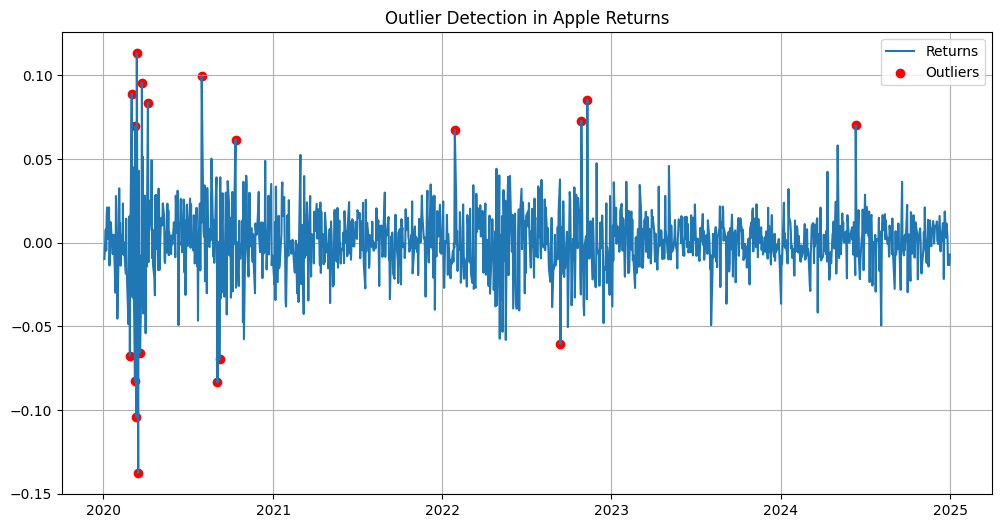

In [58]:
from scipy.stats import zscore

returns['Z_Score'] = zscore(returns['AAPL'])
outliers = returns[np.abs(returns['Z_Score']) > 3]

plt.figure(figsize=(12, 6))
plt.plot(returns['AAPL'], label='Returns')
plt.scatter(outliers.index, outliers['AAPL'], color='red', label='Outliers')
plt.title('Outlier Detection in Apple Returns')
plt.legend()
plt.grid(True)
plt.show()

# Temporal Patterns, Seasonality & Regime Detection

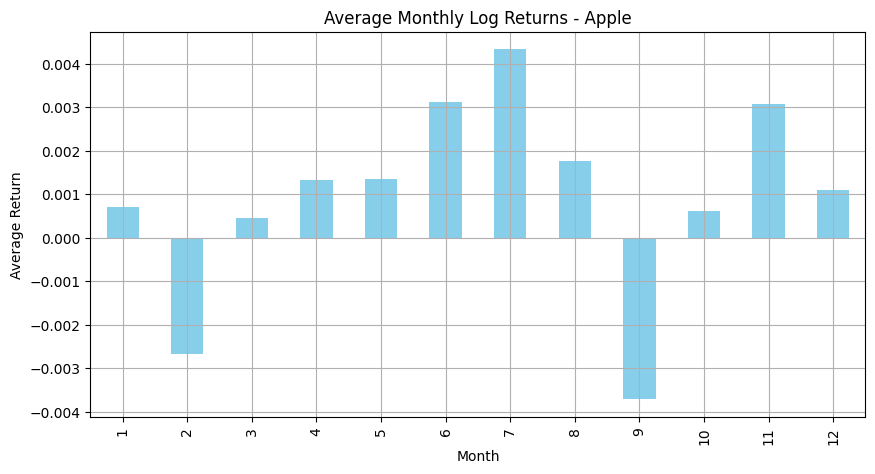

In [62]:
returns['Month'] = returns.index.month
monthly_avg = returns.groupby('Month').mean()

plt.figure(figsize=(10, 5))
monthly_avg['AAPL'].plot(kind='bar', color='skyblue')
plt.title('Average Monthly Log Returns - Apple')
plt.xlabel('Month')
plt.ylabel('Average Return')
plt.grid(True)
plt.show()

In [7]:
import yfinance as yf

# Download historical data explicitly specifying the adjusted close
aapl_data = yf.download('AAPL', start='2020-01-01', end='2025-03-26', auto_adjust=True)

# Now 'Close' represents adjusted close due to auto_adjust=True
returns = aapl_data[['Close']].pct_change().dropna()
returns.rename(columns={'Close': 'AAPL'}, inplace=True)

# Calculate rolling indicators
returns['Rolling_Max_20'] = returns['AAPL'].rolling(window=20).max()
returns['Momentum_5'] = returns['AAPL'] - returns['AAPL'].shift(5)
returns['Volatility_20'] = returns['AAPL'].rolling(window=20).std()

returns.dropna(inplace=True)

# Display the resulting DataFrame
returns.head()


[*********************100%***********************]  1 of 1 completed


Price,AAPL,Rolling_Max_20,Momentum_5,Volatility_20
Ticker,AAPL,,,
Date,,,,
2020-01-31,-0.044339,0.028289,-0.041457,0.017679
2020-02-03,-0.002746,0.028289,0.026659,0.017511
2020-02-04,0.033014,0.033014,0.004724,0.018808
2020-02-05,0.008154,0.033014,-0.012778,0.018741
2020-02-06,0.011697,0.033014,0.013146,0.018616
